# Pass Network

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch
%matplotlib inline

In [2]:
with open('7560.json',encoding="utf-8") as data:
    events = json.load(data)

In [3]:
import pprint

In [4]:
def lineup(file):     
    
    players = []

    for i in file:        
        players.append(i['player']['name'])
       
    
    return players

In [5]:
lineup = lineup(events[1]['tactics']['lineup'])

In [6]:
lineup

['Munir Mohand Mohamedi',
 'Nabil Dirar',
 'Manuel Marouan da Costa Trinidade',
 'Romain Saïss',
 'Achraf Hakimi Mouh',
 'Karim El Ahmadi Al Aroos',
 'Nordin Amrabat',
 'Mbark Boussoufa',
 'Younès Belhanda',
 'Hakim Ziyech',
 'Khalid Boutaïb']

In [7]:
events[1]

{'id': '8db0707e-fc12-4a74-be54-b987d1dc9ee3',
 'index': 2,
 'period': 1,
 'timestamp': '00:00:00.000',
 'minute': 0,
 'second': 0,
 'type': {'id': 35, 'name': 'Starting XI'},
 'possession': 1,
 'possession_team': {'id': 772, 'name': 'Spain'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 788, 'name': 'Morocco'},
 'duration': 0.0,
 'tactics': {'formation': 4141,
  'lineup': [{'player': {'id': 5233, 'name': 'Munir Mohand Mohamedi'},
    'position': {'id': 1, 'name': 'Goalkeeper'},
    'jersey_number': 12},
   {'player': {'id': 5727, 'name': 'Nabil Dirar'},
    'position': {'id': 2, 'name': 'Right Back'},
    'jersey_number': 17},
   {'player': {'id': 5221, 'name': 'Manuel Marouan da Costa Trinidade'},
    'position': {'id': 3, 'name': 'Right Center Back'},
    'jersey_number': 4},
   {'player': {'id': 5219, 'name': 'Romain Saïss'},
    'position': {'id': 5, 'name': 'Left Center Back'},
    'jersey_number': 6},
   {'player': {'id': 5245, 'name': 'Achraf Hakimi Mouh'

In [8]:
passes = []
c = 0
for i in events:
    if 'pass' in i.keys():
        passes.append(i)
        c=c+1

c

1004

In [9]:
successful_passes = []
c = 0
for i in passes:
    if ('recipient' in i['pass'].keys()) and (i['team']['id'] == 788):
        successful_passes.append(i)
            #print('BOUM')
            
        c = c + 1
        
c

231

In [10]:
"Marie Hourihan" in lineup

False

### Pass connection dataframe

In [11]:
id_players = []
players = []
x_starts = []
y_starts = []
id_recipients = []
recipients = []
x_ends = []
y_ends = []

for i in successful_passes:
    id_players.append(i['player']['id'])    
    players.append(i['player']['name'])
    x_starts.append(i['location'][0])
    y_starts.append(i['location'][1])
    id_recipients.append(i['pass']['recipient']['id'])
    recipients.append(i['pass']['recipient']['name'])
    x_ends.append(i['pass']['end_location'][0])
    y_ends.append(i['pass']['end_location'][1])
    

In [12]:
network = {'Player id':id_players,'Player':players,'X start':x_starts,'Y start':y_starts,'Recipient id':id_recipients,'Recipient':recipients,'X end':x_ends,'Y end':y_ends}
    

In [13]:
df = pd.DataFrame(network)

In [14]:
df

,Player id,Player,X start,Y start,Recipient id,Recipient,X end,Y end
0,5236,Karim El Ahmadi Al Aroos,53.0,61.0,3302,Nordin Amrabat,54.0,63.0
1,3302,Nordin Amrabat,59.0,78.0,5726,Khalid Boutaïb,107.0,64.0
2,5237,Hakim Ziyech,82.0,13.0,5245,Achraf Hakimi Mouh,78.0,9.0
3,5245,Achraf Hakimi Mouh,81.0,9.0,5242,Younès Belhanda,88.0,3.0
4,5242,Younès Belhanda,89.0,3.0,5237,Hakim Ziyech,89.0,13.0
...,...,...,...,...,...,...,...,...
226,5223,Aziz Bouhaddouz,60.0,40.0,5724,Fayçal Fajr,49.0,34.0
227,5724,Fayçal Fajr,48.0,35.0,5221,Manuel Marouan da Costa Trinidade,32.0,42.0
228,5245,Achraf Hakimi Mouh,77.0,1.0,6301,Youssef En-Nesyri,99.0,6.0
229,3302,Nordin Amrabat,71.0,27.0,5221,Manuel Marouan da Costa Trinidade,62.0,35.0


### Average position per player

In [15]:
mean_pos = df.groupby(['Player'],as_index=False).mean()
mean_pos

,Player,Player id,X start,Y start,Recipient id,X end,Y end
0,Achraf Hakimi Mouh,5245.0,54.083333,10.541667,5260.583333,58.541667,17.791667
1,Aziz Bouhaddouz,5223.0,63.000000,29.000000,5724.000000,54.000000,23.000000
2,Fayçal Fajr,5724.0,67.125000,46.000000,4941.500000,67.875000,50.250000
3,Hakim Ziyech,5237.0,64.722222,36.833333,5430.722222,69.222222,39.388889
4,Karim El Ahmadi Al Aroos,5236.0,49.500000,43.428571,5099.285714,52.785714,40.714286
5,Khalid Boutaïb,5726.0,59.800000,50.000000,5042.200000,59.800000,49.300000
6,Manuel Marouan da Costa Trinidade,5221.0,33.680000,58.720000,5078.480000,48.160000,51.000000
7,Mbark Boussoufa,5232.0,51.782609,46.913043,5049.565217,52.608696,42.739130
8,Munir Mohand Mohamedi,5233.0,10.363636,44.409091,5309.954545,50.409091,48.136364
9,Nabil Dirar,5727.0,60.814815,70.777778,5005.074074,65.851852,65.851852


### Number of total pass per player

In [16]:
count_pass = df.groupby(["Player"],as_index=False)["X start"].count()
count_pass.rename({"Player": "Player", "X start" : "Count"}, axis=1,inplace=True)

In [17]:
count_pass

,Player,Count
0,Achraf Hakimi Mouh,24
1,Aziz Bouhaddouz,2
2,Fayçal Fajr,8
3,Hakim Ziyech,18
4,Karim El Ahmadi Al Aroos,14
5,Khalid Boutaïb,10
6,Manuel Marouan da Costa Trinidade,25
7,Mbark Boussoufa,23
8,Munir Mohand Mohamedi,22
9,Nabil Dirar,27


### Count the number of passes for each pair of players

In [18]:
pair_passes = df.groupby(["Player","Recipient"],as_index=False)["X start"].count()

In [19]:
pair_passes

,Player,Recipient,X start
0,Achraf Hakimi Mouh,Fayçal Fajr,1
1,Achraf Hakimi Mouh,Hakim Ziyech,6
2,Achraf Hakimi Mouh,Karim El Ahmadi Al Aroos,1
3,Achraf Hakimi Mouh,Khalid Boutaïb,2
4,Achraf Hakimi Mouh,Manuel Marouan da Costa Trinidade,1
...,...,...,...
103,Younès Belhanda,Nordin Amrabat,1
104,Younès Belhanda,Romain Saïss,2
105,Youssef En-Nesyri,Achraf Hakimi Mouh,2
106,Youssef En-Nesyri,Fayçal Fajr,1


In [20]:
pair_passes.rename({"Player": "Player", "Recipient": "Recipient","X start" : "Count"}, axis=1,inplace=True)

In [21]:
#Delete all the number of passes that are only equal "1"
for i in range(len(pair_passes)):
    if pair_passes.loc[i,"Count"] == 1:
        pair_passes.drop(i,inplace=True)
    
  

In [22]:
pair_passes.sort_values(by="Count",ascending=False)

,Player,Recipient,Count
8,Achraf Hakimi Mouh,Younès Belhanda,7
74,Nabil Dirar,Mbark Boussoufa,7
1,Achraf Hakimi Mouh,Hakim Ziyech,6
35,Khalid Boutaïb,Mbark Boussoufa,5
97,Younès Belhanda,Achraf Hakimi Mouh,5
76,Nabil Dirar,Nordin Amrabat,5
55,Mbark Boussoufa,Nabil Dirar,5
45,Manuel Marouan da Costa Trinidade,Munir Mohand Mohamedi,5
27,Karim El Ahmadi Al Aroos,Mbark Boussoufa,5
93,Romain Saïss,Nabil Dirar,4


# Merging dataframes

Merging the **count_pass** & **mean_pos** dataframes to combine the data for better plotting

In [23]:
pos_pass = pd.merge(count_pass,mean_pos,how="outer",on=['Player'])

In [24]:
pos_pass

,Player,Count,Player id,X start,Y start,Recipient id,X end,Y end
0,Achraf Hakimi Mouh,24,5245.0,54.083333,10.541667,5260.583333,58.541667,17.791667
1,Aziz Bouhaddouz,2,5223.0,63.000000,29.000000,5724.000000,54.000000,23.000000
2,Fayçal Fajr,8,5724.0,67.125000,46.000000,4941.500000,67.875000,50.250000
3,Hakim Ziyech,18,5237.0,64.722222,36.833333,5430.722222,69.222222,39.388889
4,Karim El Ahmadi Al Aroos,14,5236.0,49.500000,43.428571,5099.285714,52.785714,40.714286
5,Khalid Boutaïb,10,5726.0,59.800000,50.000000,5042.200000,59.800000,49.300000
6,Manuel Marouan da Costa Trinidade,25,5221.0,33.680000,58.720000,5078.480000,48.160000,51.000000
7,Mbark Boussoufa,23,5232.0,51.782609,46.913043,5049.565217,52.608696,42.739130
8,Munir Mohand Mohamedi,22,5233.0,10.363636,44.409091,5309.954545,50.409091,48.136364
9,Nabil Dirar,27,5727.0,60.814815,70.777778,5005.074074,65.851852,65.851852


In [25]:
p_pos = df.groupby(['Player'],as_index=False)['X start','Y start'].mean()
p_pos

<ipython-input-25-3475fcae6efc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p_pos = df.groupby(['Player'],as_index=False)['X start','Y start'].mean()


,Player,X start,Y start
0,Achraf Hakimi Mouh,54.083333,10.541667
1,Aziz Bouhaddouz,63.000000,29.000000
2,Fayçal Fajr,67.125000,46.000000
3,Hakim Ziyech,64.722222,36.833333
4,Karim El Ahmadi Al Aroos,49.500000,43.428571
5,Khalid Boutaïb,59.800000,50.000000
6,Manuel Marouan da Costa Trinidade,33.680000,58.720000
7,Mbark Boussoufa,51.782609,46.913043
8,Munir Mohand Mohamedi,10.363636,44.409091
9,Nabil Dirar,60.814815,70.777778


In [26]:
mean_passes = df.groupby(["Player","Recipient"],as_index=False)["X start"].count()
mean_passes.rename({"Player": "Player", "Recipient": "Recipient","X start" : "Count"}, axis=1,inplace=True)
mean_passes

,Player,Recipient,Count
0,Achraf Hakimi Mouh,Fayçal Fajr,1
1,Achraf Hakimi Mouh,Hakim Ziyech,6
2,Achraf Hakimi Mouh,Karim El Ahmadi Al Aroos,1
3,Achraf Hakimi Mouh,Khalid Boutaïb,2
4,Achraf Hakimi Mouh,Manuel Marouan da Costa Trinidade,1
...,...,...,...
103,Younès Belhanda,Nordin Amrabat,1
104,Younès Belhanda,Romain Saïss,2
105,Youssef En-Nesyri,Achraf Hakimi Mouh,2
106,Youssef En-Nesyri,Fayçal Fajr,1


In [27]:
mean_passes.dropna()

,Player,Recipient,Count
0,Achraf Hakimi Mouh,Fayçal Fajr,1
1,Achraf Hakimi Mouh,Hakim Ziyech,6
2,Achraf Hakimi Mouh,Karim El Ahmadi Al Aroos,1
3,Achraf Hakimi Mouh,Khalid Boutaïb,2
4,Achraf Hakimi Mouh,Manuel Marouan da Costa Trinidade,1
...,...,...,...
103,Younès Belhanda,Nordin Amrabat,1
104,Younès Belhanda,Romain Saïss,2
105,Youssef En-Nesyri,Achraf Hakimi Mouh,2
106,Youssef En-Nesyri,Fayçal Fajr,1


In [28]:
xstarts = []
ystarts = []
xends = []
yends = []
c =0
for i,rowi in mean_passes.iterrows():
    for j,rowj in p_pos.iterrows():
        if rowi['Player'] == rowj['Player']:
            xstarts.append(rowj['X start'])
            ystarts.append(rowj['Y start'])
        if rowi['Recipient'] == rowj['Player']:
            xends.append(rowj['X start'])
            yends.append(rowj['Y start'])
            
            c = c +1
c
        

108

In [29]:
print(len(xstarts))
print(len(ystarts))
print(len(xends))
print(len(yends))

108
108
108
108


In [30]:
mean_passes['X start'] = xstarts
mean_passes['Y start'] = ystarts
mean_passes['X end'] = xends
mean_passes['Y end'] = yends


In [31]:
mean_passes

,Player,Recipient,Count,X start,Y start,X end,Y end
0,Achraf Hakimi Mouh,Fayçal Fajr,1,54.083333,10.541667,67.125000,46.000000
1,Achraf Hakimi Mouh,Hakim Ziyech,6,54.083333,10.541667,64.722222,36.833333
2,Achraf Hakimi Mouh,Karim El Ahmadi Al Aroos,1,54.083333,10.541667,49.500000,43.428571
3,Achraf Hakimi Mouh,Khalid Boutaïb,2,54.083333,10.541667,59.800000,50.000000
4,Achraf Hakimi Mouh,Manuel Marouan da Costa Trinidade,1,54.083333,10.541667,33.680000,58.720000
...,...,...,...,...,...,...,...
103,Younès Belhanda,Nordin Amrabat,1,47.750000,28.187500,57.533333,50.933333
104,Younès Belhanda,Romain Saïss,2,47.750000,28.187500,36.434783,29.173913
105,Youssef En-Nesyri,Achraf Hakimi Mouh,2,56.000000,48.000000,54.083333,10.541667
106,Youssef En-Nesyri,Fayçal Fajr,1,56.000000,48.000000,67.125000,46.000000


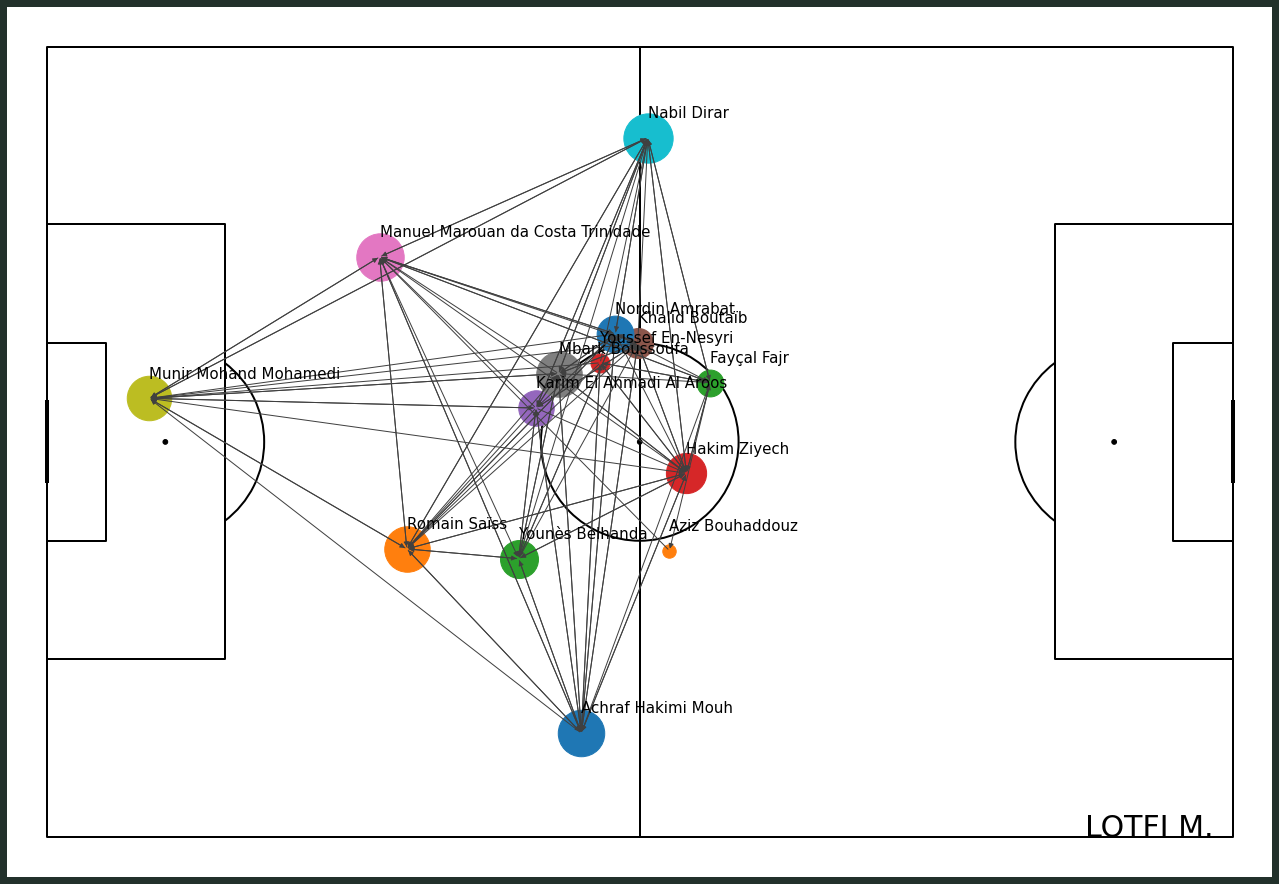

In [44]:
arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5

# DRawing the plot
fig,ax = plt.subplots(figsize=(28,16))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Drawing the pitch over the plot
pitch = Pitch(pitch_color='white',line_color='black',stripe=False)
pitch.draw(ax=ax)

#Invert Y axis
plt.gca().invert_yaxis()

plt.text(105,0,"LOTFI M.",fontsize=30)


    
for i,row in mean_passes.iterrows():
        ax.annotate("",xy=(row['X start'],row['Y start']),xytext=(row['X end'],row['Y end']),arrowprops=dict(arrowstyle="-|>", color="0.25"))

for i, row in pos_pass.iterrows():

    plt.scatter(row['X start'],row['Y start'],s=row['Count']*90)
    plt.text(row['X start'],row['Y start']+2,row['Player'],fontsize=15)
